In [341]:
letter="a"
band=1

import numpy as np
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.utils.data import download_file
from astropy.io import fits
from matplotlib.colors import LogNorm
from photutils import CircularAperture
from astropy import units as u
from photutils import aperture_photometry
from photutils import CircularAnnulus
from photutils import EllipticalAnnulus
from math import sin, cos, pi
from photutils import EllipticalAperture

bandCorrectionFactor=[1.9350E-6,2.7048E-6,1.8326e-6,5.2269E-5]
bandFrequency=[2.99792e8/3.4e-6,2.99792e8/4.6e-6,2.99792e8/12e-6,2.99792e8/22e-6]
if band == 1:
    ChosenBandCorrectionFactor=bandCorrectionFactor[0]*bandFrequency[0]
elif band == 2:
    ChosenBandCorrectionFactor=bandCorrectionFactor[1]*bandFrequency[1]
elif band == 3:
    ChosenBandCorrectionFactor=bandCorrectionFactor[2]*bandFrequency[2]
elif band ==4: 
    ChosenBandCorrectionFactor=bandCorrectionFactor[3]*bandFrequency[3]
    
cycle=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
GalAPetRad=[9.6,12.3,6.3,8.9,10.3,6.2,10.5,10.3,18.2,39.5,44.4,51.3,8.8,6.6,100,100,12.5] #In arc seconds. One pixel =1.375"
GalAInc=[43,62,55,47,64,35,41,22,40,22,30,23,44,25,0,0,30]
GalAPA=[0,135,0,60,0,0,60,30,0,60,150,90,35,45,0,0,140]
GalAPixCentreXVal=[221,215,219,214,215,227,219,225,219,219,202,219,221,220,219,100,219]
GalAPixCentreYVal=[209,223,219,223,235,226,220,212,219,219,219,219,222,219,219,100,219]
GalAMajAxis=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
GalAMinAxis=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
GalBPetRad=[2.5,11,7.7,2.5,11.3,7.2,10.3,10.3,15.3,68.4,68.4,68.4,2.5,10.3,17.7,18.0,100]
GalBInc=[40,49,73,40,65,33,56,32,49,11,11,11,41,32,0,0,45]
GalBPA=[0,0,0,0,0,0,0,58.2,40,55,55,55,0,58.2,0,45,0]
GalBPixCentreXVal=[219,229,219,219,228,219,223,219,219,219,219,219,220,219,219,219,219]
GalBPixCentreYVal=[219,219,219,219,208,220,211,219,219,219,219,219,220,219,219,219,219]
GalBMajAxis=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
GalBMinAxis=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in cycle:
    GalAMajAxis[i-1]=(2*GalAPetRad[i-1])/1.375
    GalAMinAxis[i-1]=GalAMajAxis[i-1]*(cos((((GalAInc[i-1])*np.pi)/180)))
    GalBMajAxis[i-1]=(2*GalBPetRad[i-1])/1.375
    GalBMinAxis[i-1]=GalBMajAxis[i-1]*(cos((((GalBInc[i-1])*np.pi)/180)))
    
#print(GalAMajAxis)
#print(GalAMinAxis)

image_dataMin = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores Mimimum Flux Value
image_dataPix = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores number of pixels in each picture
image_dataAve = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores average values of pixels in picture
image_dataMinAp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores Mimimum Flux Value in aperture
image_dataPixAp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores number of pixels in each aperture
image_dataAveAp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores average values of pixels in aperture
arrmgePic =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
photsum = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
tot_table=[0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]

#Finding background locally

Backgroundlevels=[]

for i in arrmgePic:
    image_file = '/mnt/lb576-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/WISE/%d%c/%d%c/%d%c/%d%cW%iPic.fits' % (i, letter, i, letter, i, letter, i, letter, band)
    hdu_list = fits.open(image_file)
    image_data = hdu_list[0].data
    hdu_list.close()
    image_dataMin[i-1]=np.min(image_data)
    #print(np.min(image_data))
    pixels = image_data.shape[0]*image_data.shape[1]
    image_dataPix[i-1]=pixels
    flat_image = list(image_data.flat)
    total = 0
    for l in range(pixels):
        total = total + flat_image[l]
    Ave=total/pixels
    b=1
    
    if letter == 'a':
        
        ratioA=GalAMajAxis[i-1]/GalAMinAxis[i-1]
        #print("increment of major axis is:", ratioA)
        toprangeA=GalAMajAxis[i-1]+(2*ratioA)
        #print("Stop before major axis is:",  toprangeA)
        #print("Stop before minor is:", GalAMinAxis[i-1]+2)
        
        rad=ratioA
               
        while rad < toprangeA:
            position = [(GalAPixCentreXVal[i-1],GalAPixCentreYVal[i-1])]
            annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioA, a_out=rad, b_out=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            image_dataAve[i-1] =Ave*ChosenBandCorrectionFactor
            data = image_data
            phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
            annulus_area=annulus_apertures.area()
            photsum[i-1] = phot_table
            rad=rad+ratioA
            b=b+1
            if rad > toprangeA:
                annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioA, a_out=rad, b_out=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
                annulus_area=annulus_apertures.area()
                Backgroundlevels.append(((phot_table[0][0])/annulus_area))
    
    else:
        
        ratioB=GalBMajAxis[i-1]/GalBMinAxis[i-1]
        #print("increment of major axis is:", ratioB)
        toprangeB=GalBMajAxis[i-1]+(2*ratioB)
        #print("Stop before major axis is:",  toprangeB)
        #print("Stop before minor is:", GalBMinAxis[i-1]+2)
        
        rad=ratioB
        
        while rad < toprangeB:
            position = [(GalBPixCentreXVal[i-1],GalBPixCentreYVal[i-1])]
            annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioB, a_out=rad, b_out=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            image_dataAve[i-1]=Ave*ChosenBandCorrectionFactor
            data = image_data
            phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
            annulus_area=annulus_apertures.area()
            photsum[i-1] = phot_table
            rad=rad+ratioB
            b=b+1
            if rad > toprangeB:
                annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioB, a_out=rad, b_out=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
                annulus_area=annulus_apertures.area()
                Backgroundlevels.append(((phot_table[0][0])/annulus_area))
  
    
print(Backgroundlevels)

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_sin

[3.4421115765139492, 3.2547375300774863, 12.858264428342823, 3.1813949765183125, 3.7600268811287498, 4.8918484991014113, 3.9297655480894274, 3.3996288665787966, 5.3896789968816066, 4.0513775794424758, 4.1191245763873248, 4.1177494086036202, 3.5008875706997125, 4.2122783382538866, 3.729716182966285, 2.0556851001526124, 4.1758283845884527]


Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


This is galaxy: 1


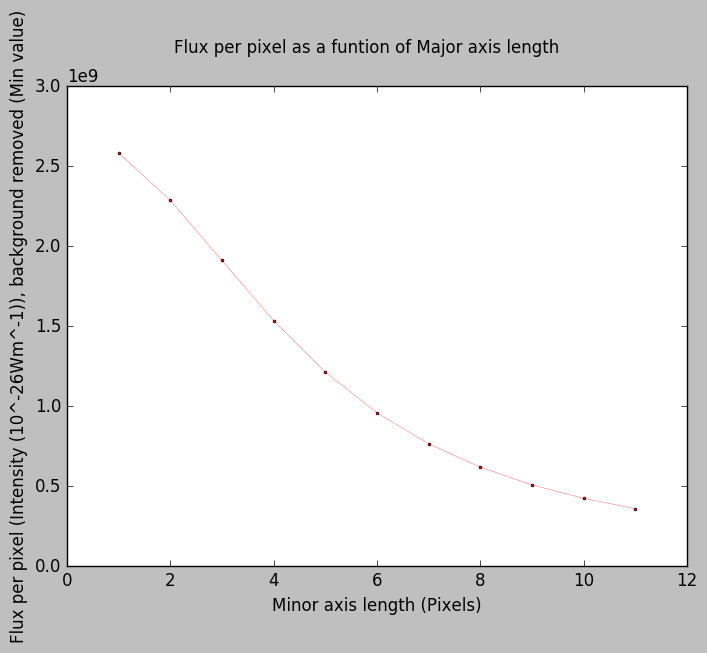

This is galaxy: 2


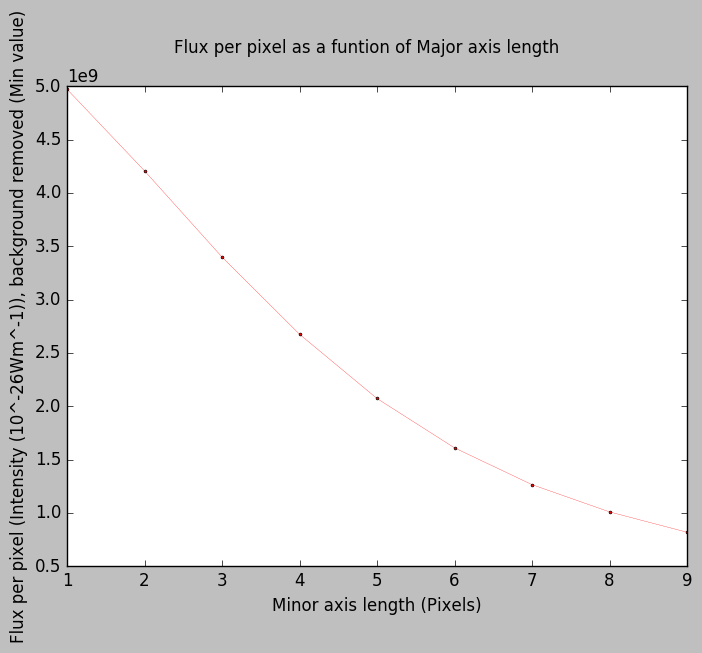

This is galaxy: 3


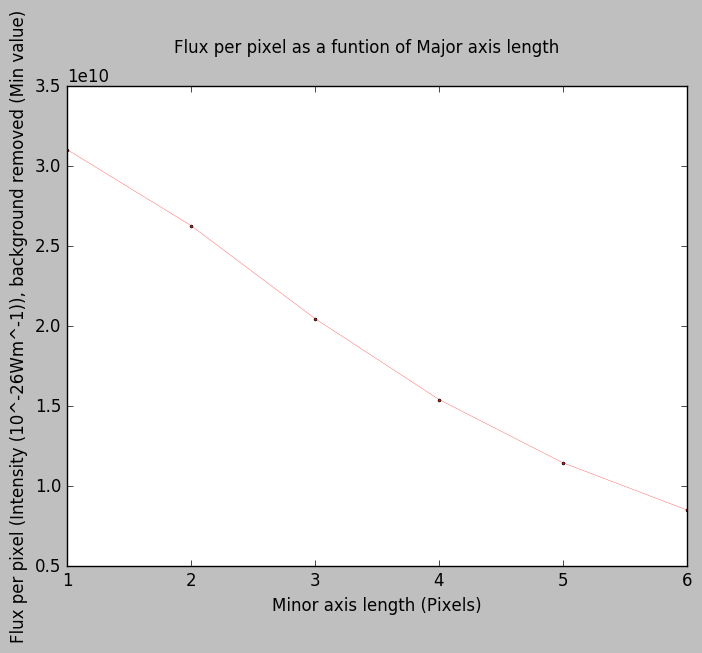

This is galaxy: 4


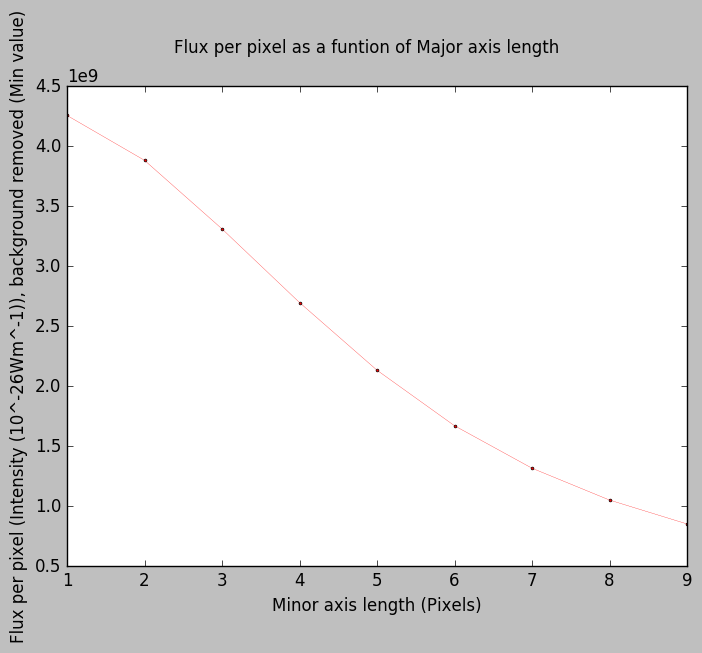

This is galaxy: 5


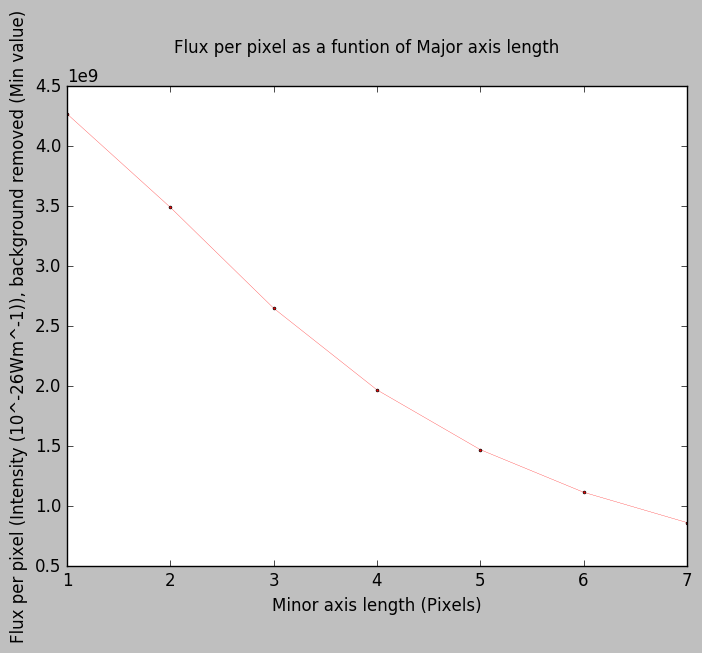

This is galaxy: 6


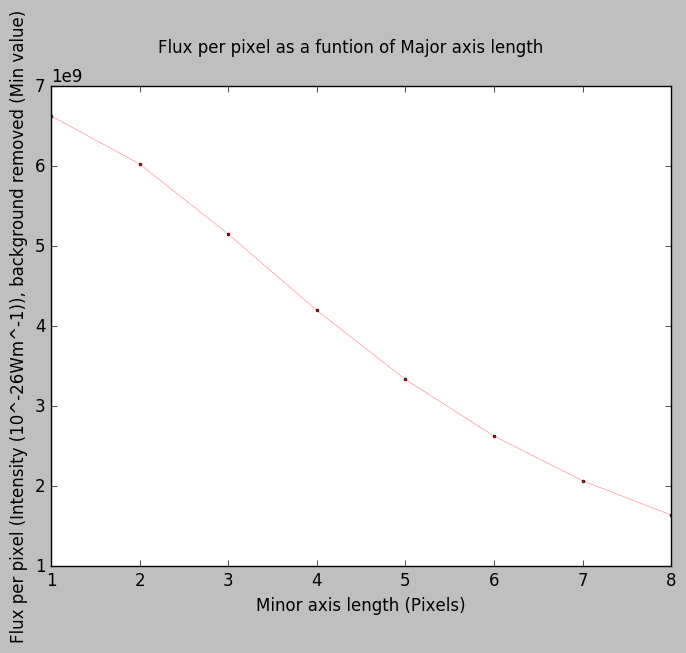

This is galaxy: 7


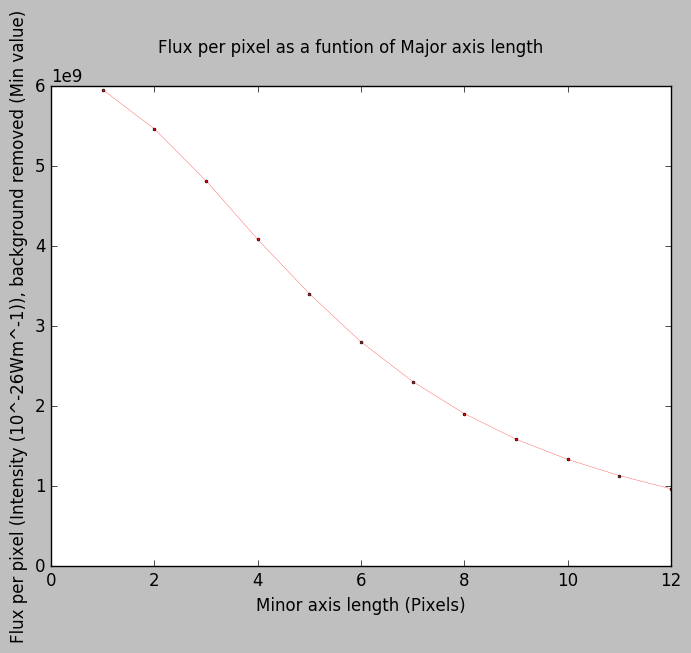

This is galaxy: 8


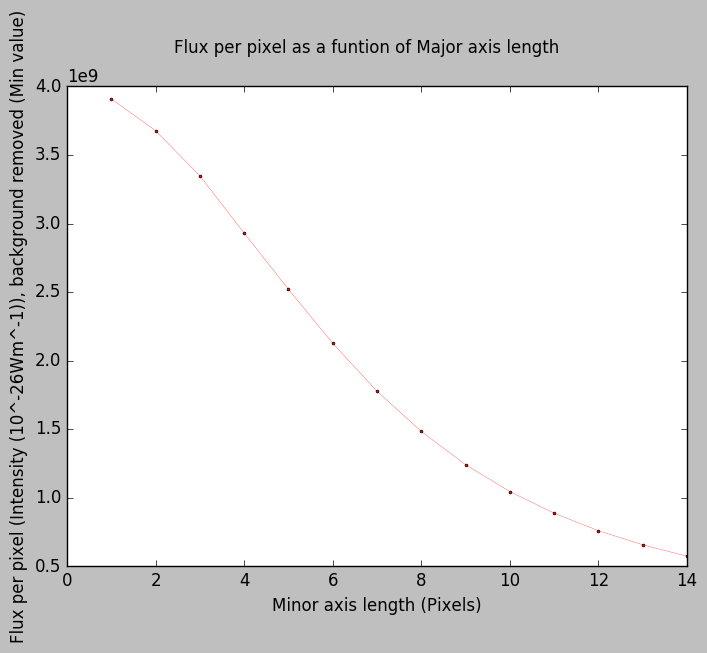

This is galaxy: 9


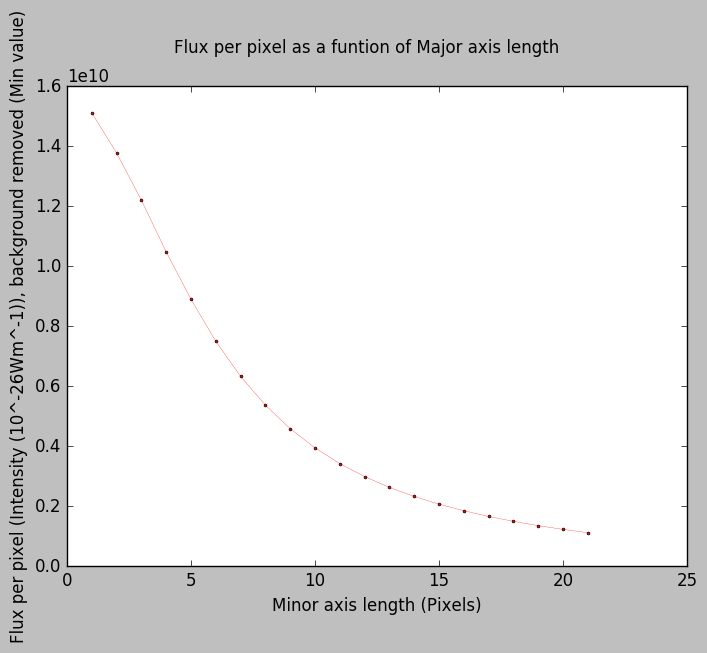

This is galaxy: 10


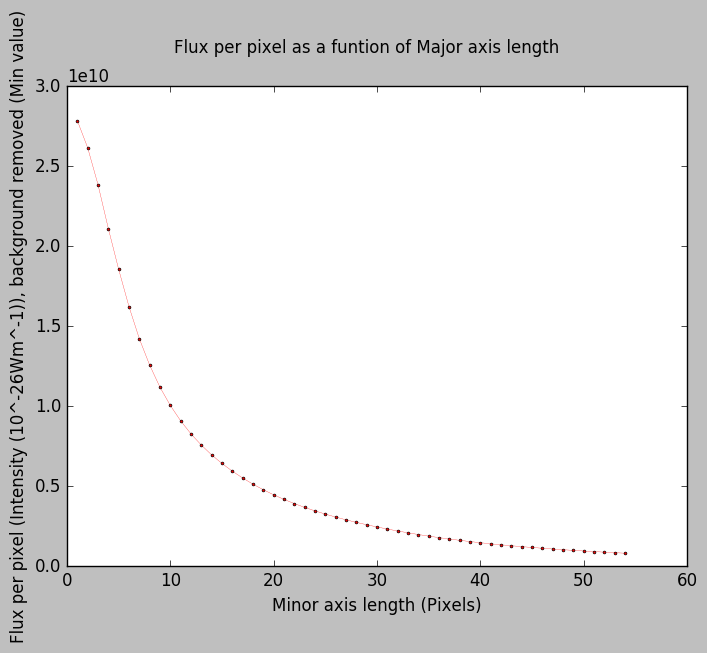

This is galaxy: 11


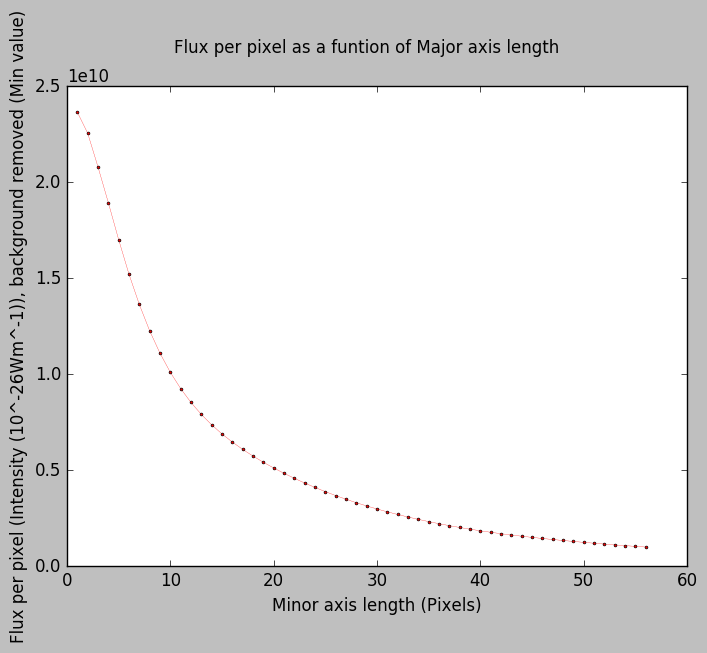

This is galaxy: 12


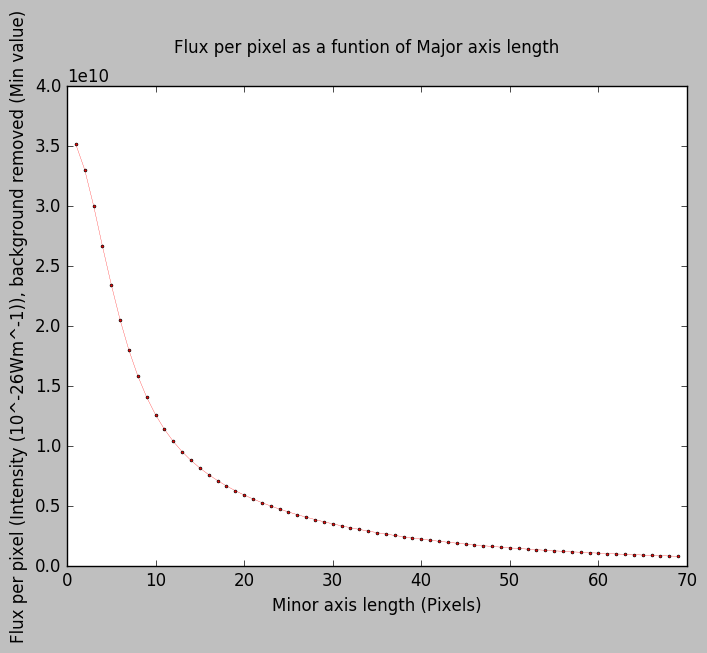

This is galaxy: 13


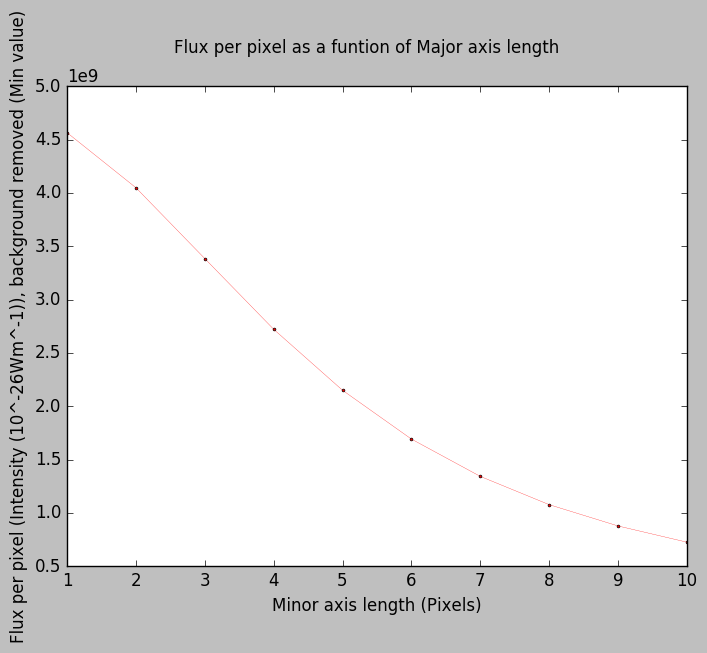

This is galaxy: 14


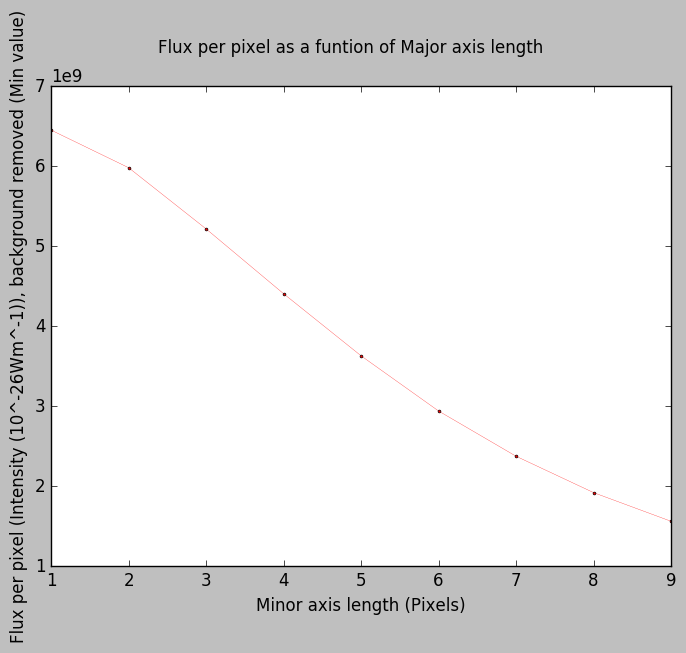

This is galaxy: 15


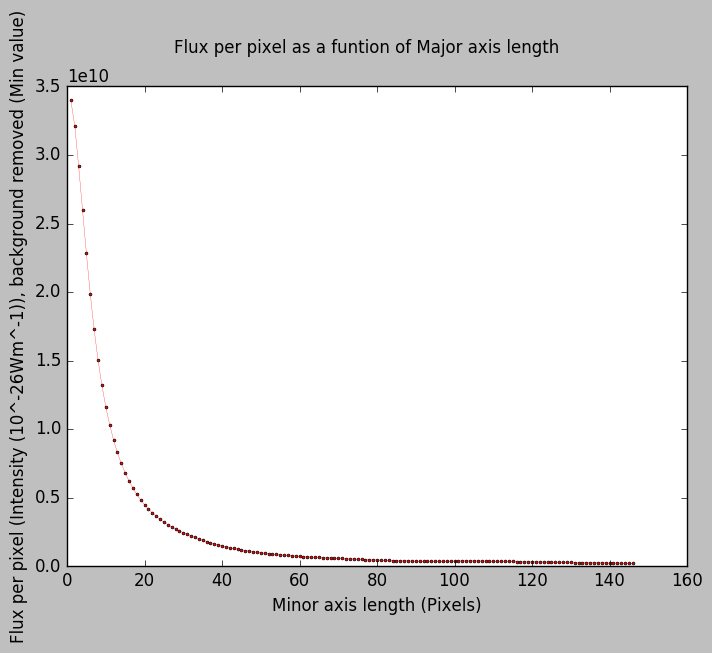

This is galaxy: 16


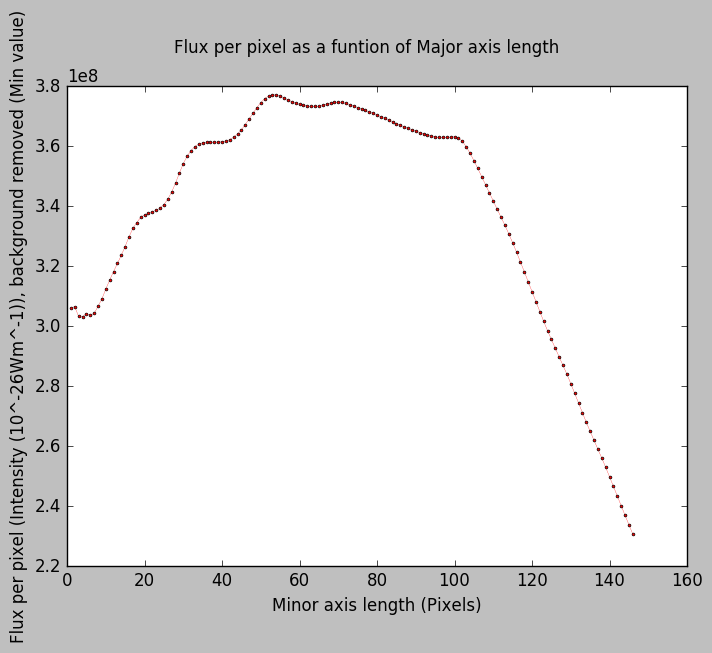

This is galaxy: 17


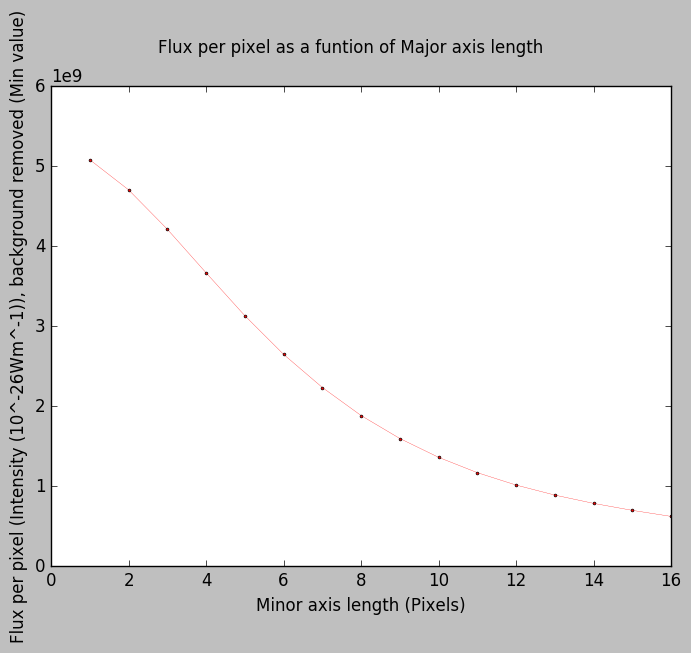

[360542621.65062988, 819954576.13078082, 8522365144.7151394, 853647752.90141046, 865048142.40684175, 1641924342.7593126, 969474387.4510603, 574000772.78335857, 1123341878.787003, 823968774.34693027, 1006539059.0877585, 841266210.59012854, 726680682.57865036, 1563256453.9810877, 228804713.75216025, 230782563.00257623, 624633369.06910765]


In [343]:
#Graphs of Flux per pixel vs radius
FluxPerPixelInLargestAperture=[]

for i in arrmgePic:
    image_file = '/mnt/lb576-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/WISE/%d%c/%d%c/%d%c/%d%cW%iPic.fits' % (i, letter, i, letter, i, letter, i, letter, band)
    hdu_list = fits.open(image_file)
    image_data = hdu_list[0].data
    hdu_list.close()
    image_dataMin[i-1]=np.min(image_data)
    pixels = image_data.shape[0]*image_data.shape[1]
    image_dataPix[i-1]=pixels
    flat_image = list(image_data.flat)
    total = 0
    for l in range(pixels):
        total = total + flat_image[l]
    Ave=total/pixels
   
    RadArray=[]
    FluxAtRad=[]
    b=1
    
    if letter == 'a':
        ratioA=GalAMajAxis[i-1]/GalAMinAxis[i-1]
        #print("increment of major axis is:", ratioA)
        toprangeA=GalAMajAxis[i-1]+ratioA
        #print("Stop before major is:",  toprangeA)
        #print("Stop before minor is:", GalAMinAxis[i-1]+1)
        
        rad=ratioA
        
        while rad < toprangeA:
            
            #print("major is:", rad)
            #print("minor is:", b)
            #print( )
            
            position = [(GalAPixCentreXVal[i-1],GalAPixCentreYVal[i-1])] #Aperture centre around the image centre
            apertures = EllipticalAperture(position, a=rad, b=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            image_dataAve[i-1]=Ave*ChosenBandCorrectionFactor
            data = image_data
            phot_table = aperture_photometry(data, apertures, method='subpixel', subpixels=10)
            photsum[i-1] = phot_table
            FluxAtRad.append(((phot_table[0][0]/(apertures.area()))-Backgroundlevels[i-1])*ChosenBandCorrectionFactor)    #Subtracts the background level
            a=apertures.area()
            RadArray.append(b)
            rad=rad+ratioA
            b=b+1
            
            #print(phot_table[0][0])
            #print(apertures.area())
        #print(RadArray)
        #print(FluxAtRad)
    
    else:
        ratioB=GalBMajAxis[i-1]/GalBMinAxis[i-1]
        #print("increment of major axis is:", ratioB)
        toprangeB=GalBMajAxis[i-1]+ratioB
        #print("Stop before major is:",  toprangeB)
        #print("Stop before minor is:", GalBMinAxis[i-1]+1)
        
        rad=ratioB
        
        while rad < toprangeB:
            
            #print("major is:", rad)
            #print("minor is:", b)
            #print( )
                        
            position = [(GalBPixCentreXVal[i-1],GalBPixCentreYVal[i-1])] #Aperture centre around the image centre
            apertures = EllipticalAperture(position, a=rad, b=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            image_dataAve[i-1]=Ave*ChosenBandCorrectionFactor
            data = image_data
            phot_table = aperture_photometry(data, apertures, method='subpixel', subpixels=10)
            photsum[i-1] = phot_table
            FluxAtRad.append(((phot_table[0][0]/(apertures.area()))-Backgroundlevels[i-1])*ChosenBandCorrectionFactor)    #Subtracts the background level
            a=apertures.area()
            RadArray.append(b)
            rad=rad+ratioB
            b=b+1
        
        #print(RadArray)
        #print(FluxAtRad[-1])
    FluxPerPixelInLargestAperture.append(FluxAtRad[-1])
    
    print("This is galaxy:", i)
    plt.figure(1)
    y1 = FluxAtRad
    x = RadArray
    #plt.errorbar(x, y1, xerr=(0.5, 0.7, 5.2, 3), ecolor='black', capthick=1.0, lw=1)
    line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
    plt.suptitle('Flux per pixel as a funtion of Major axis length')
    plt.xlabel('Minor axis length (Pixels)')
    plt.ylabel('Flux per pixel (Intensity (10^-26Wm^-1)), background removed (Min value)')
    labels=RadArray
    plt.show()

print(FluxPerPixelInLargestAperture)

/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


This is galaxy: 1


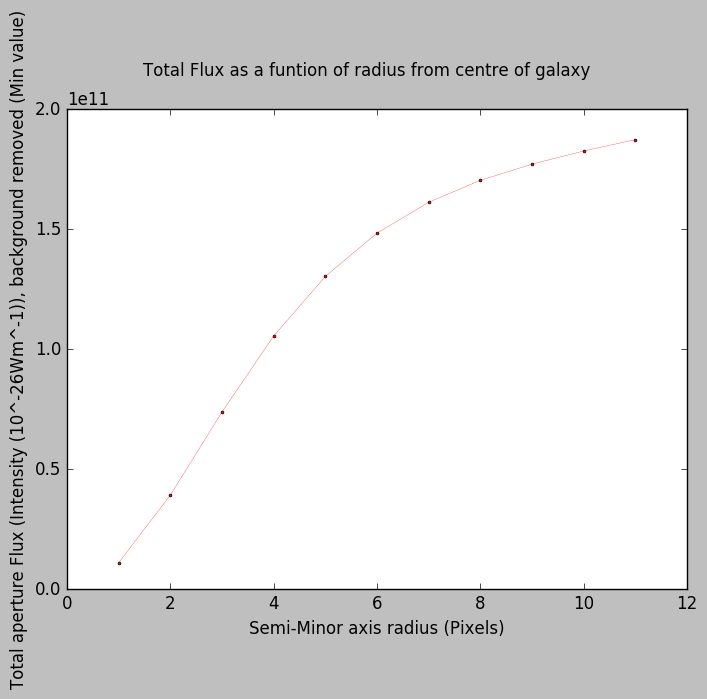

/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


This is galaxy: 2


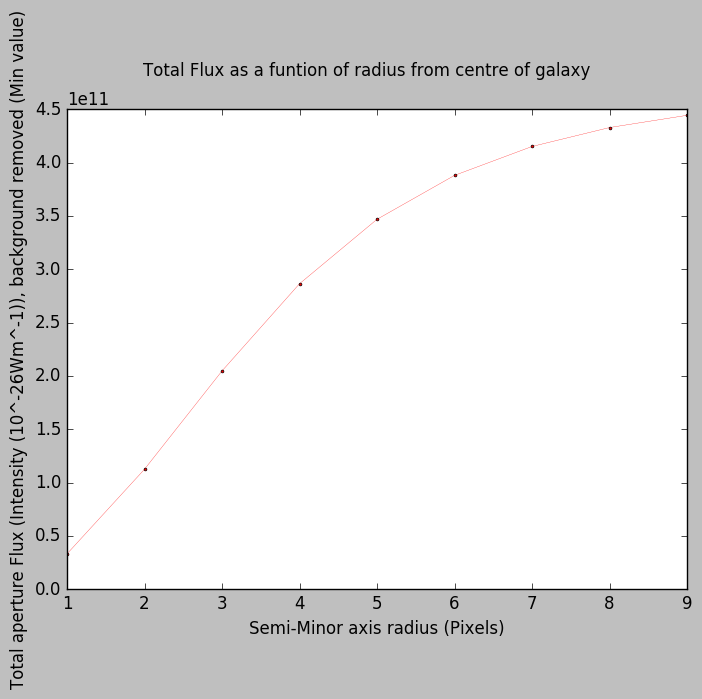

/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


This is galaxy: 3


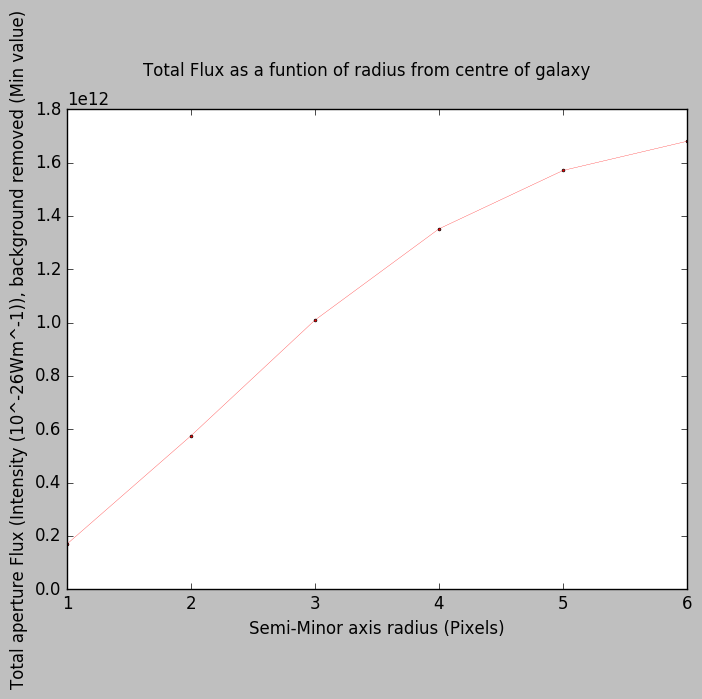

/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


This is galaxy: 4


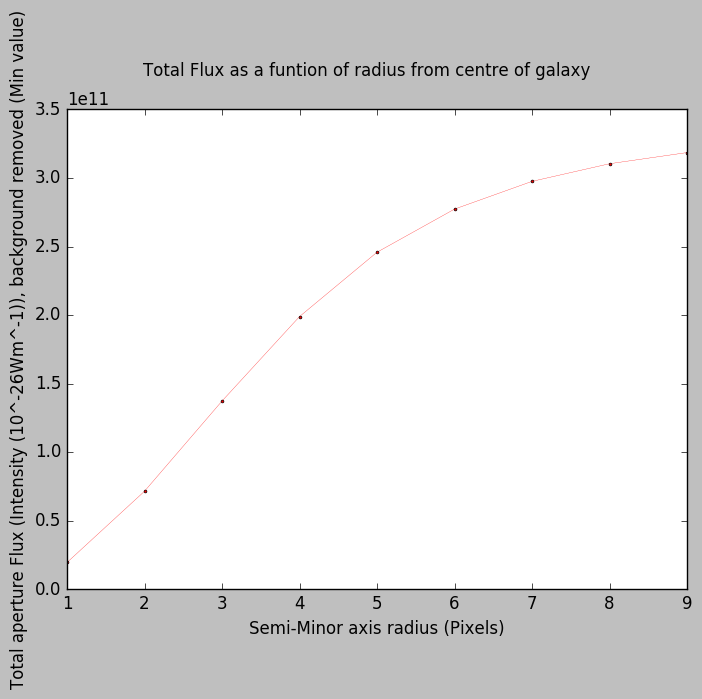

/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


This is galaxy: 5


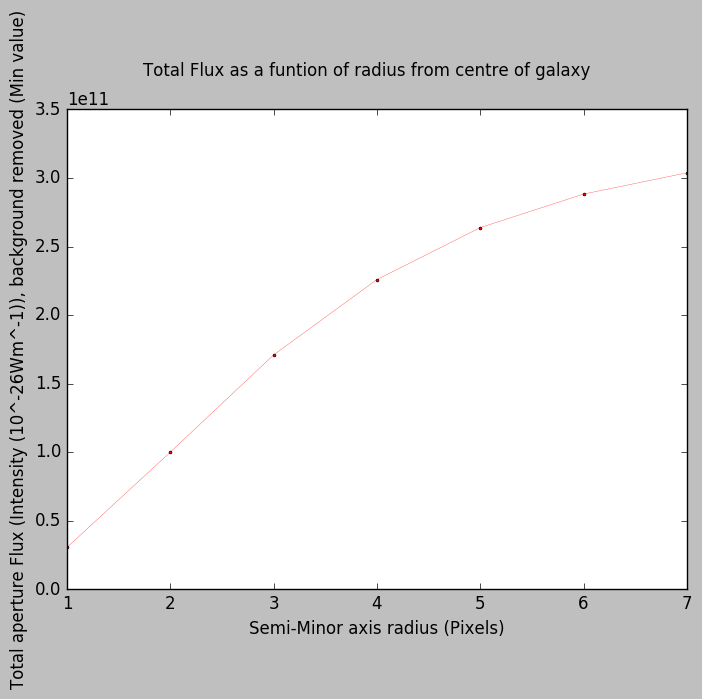

/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


This is galaxy: 6


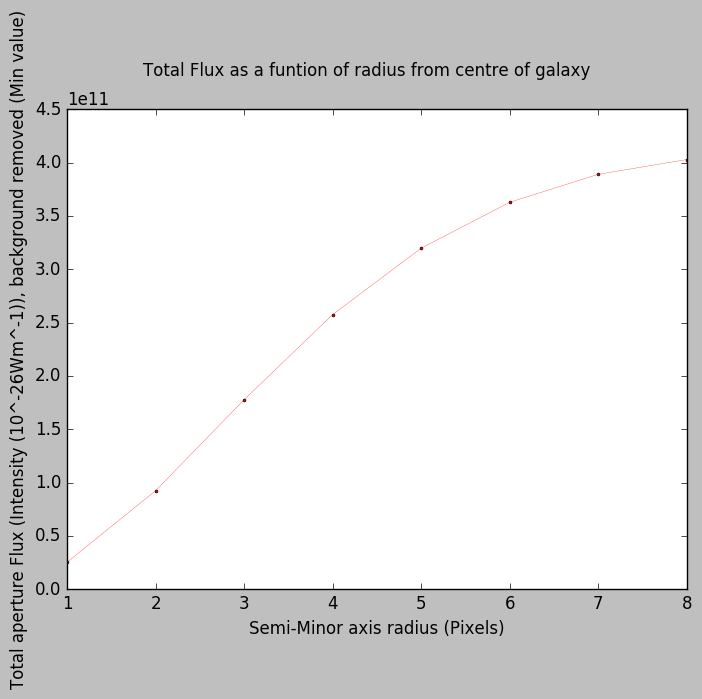

/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


This is galaxy: 7


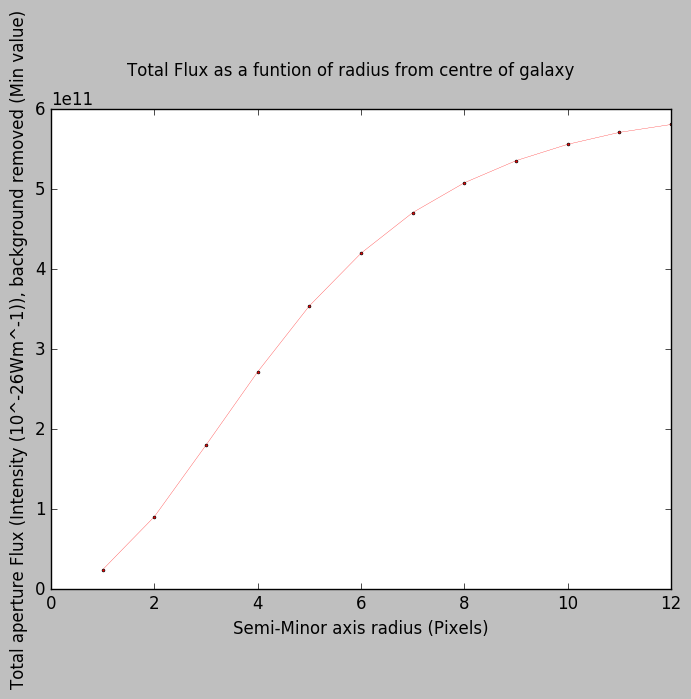

This is galaxy: 8


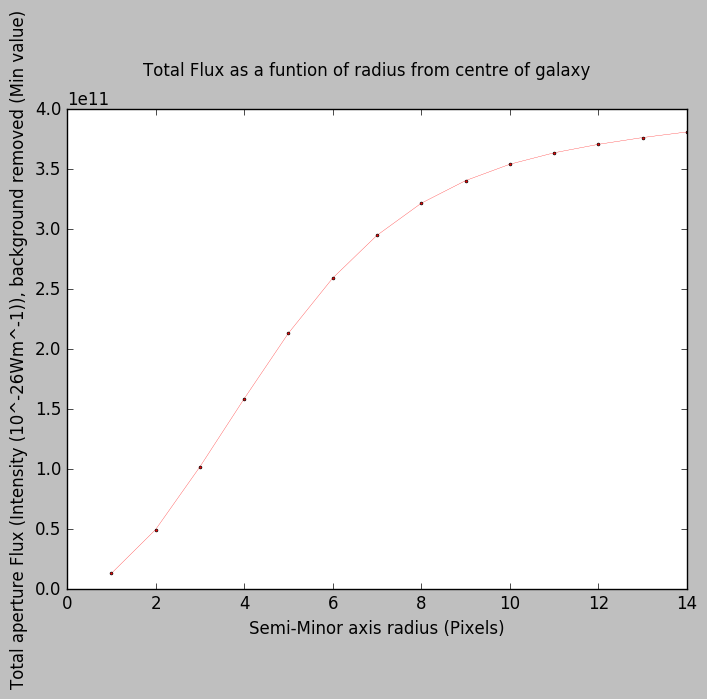

This is galaxy: 9


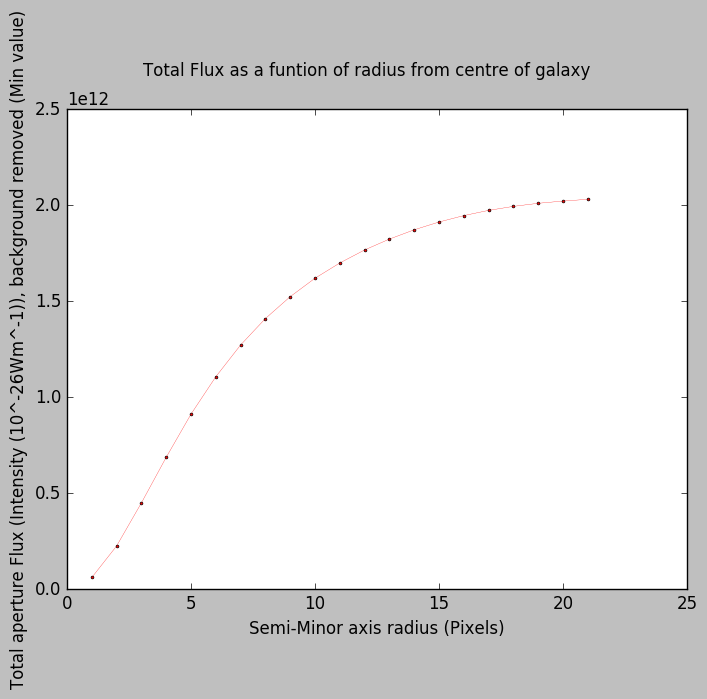

This is galaxy: 10


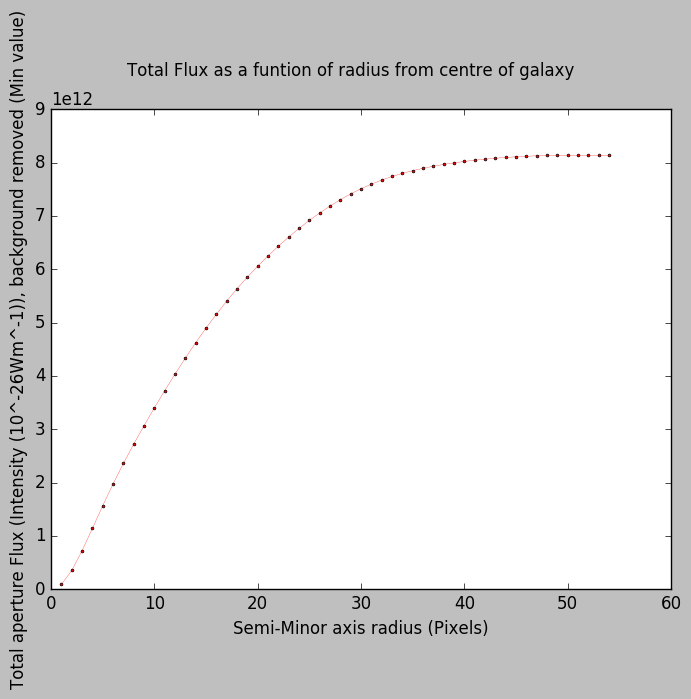

This is galaxy: 11


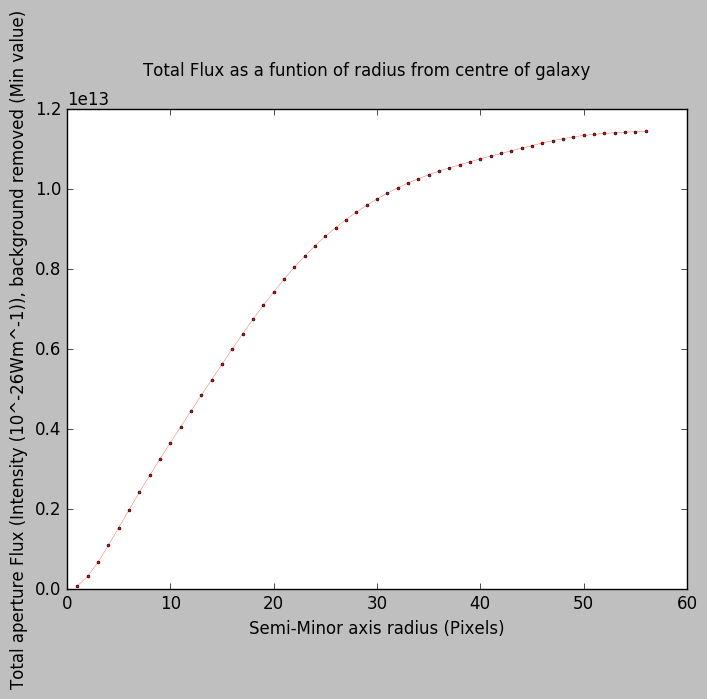

This is galaxy: 12


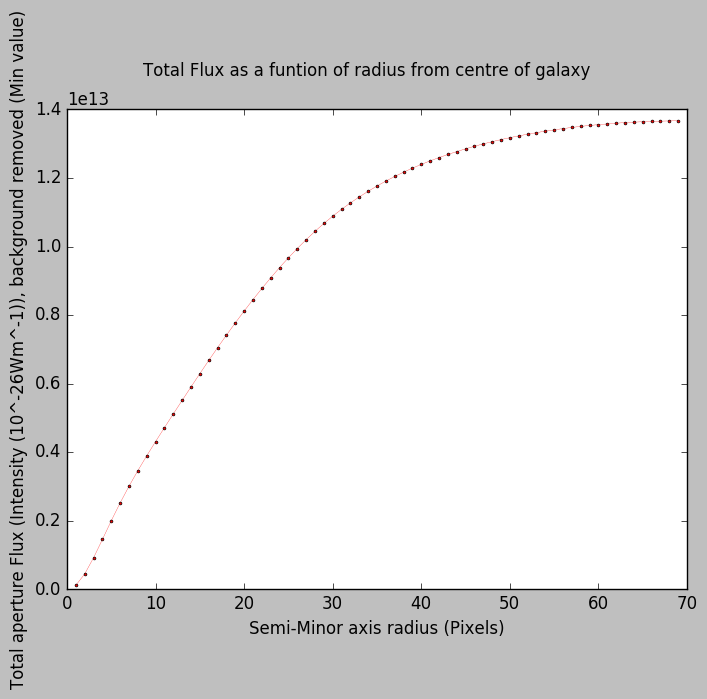

/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


This is galaxy: 13


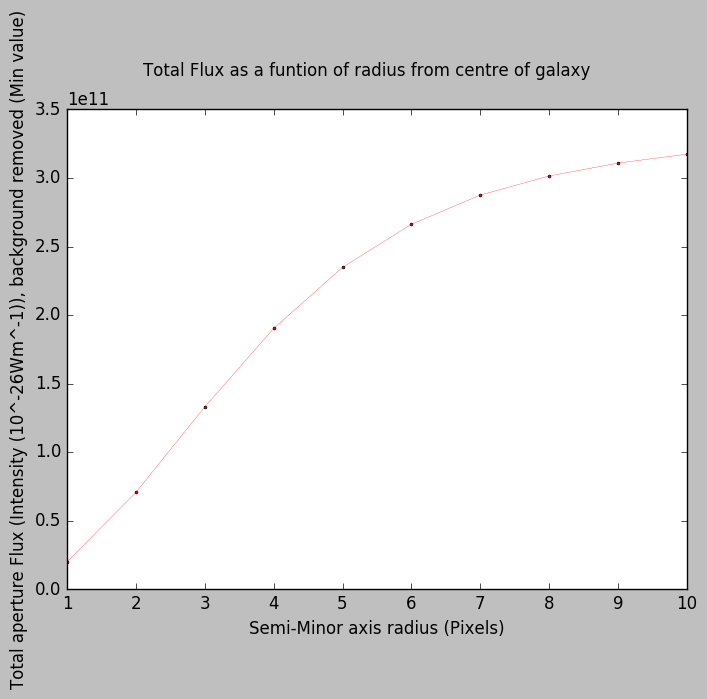

/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


This is galaxy: 14


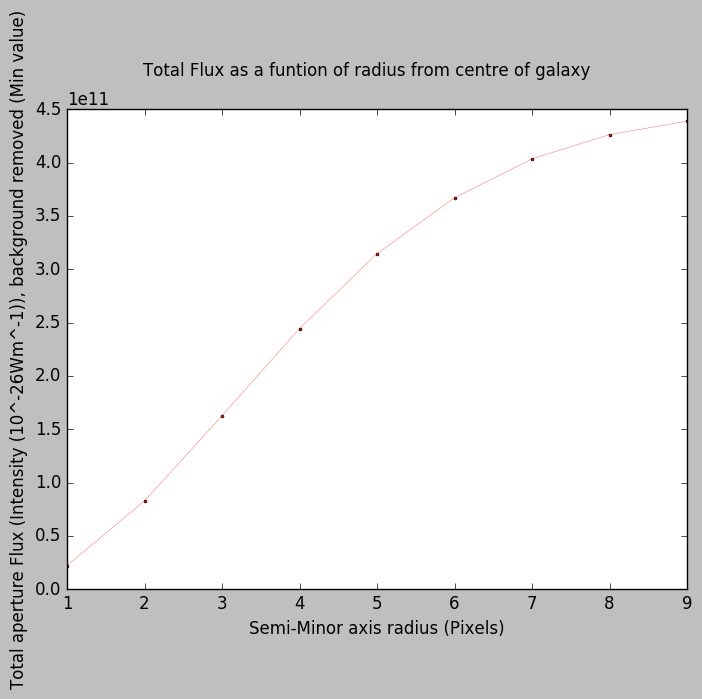

This is galaxy: 15


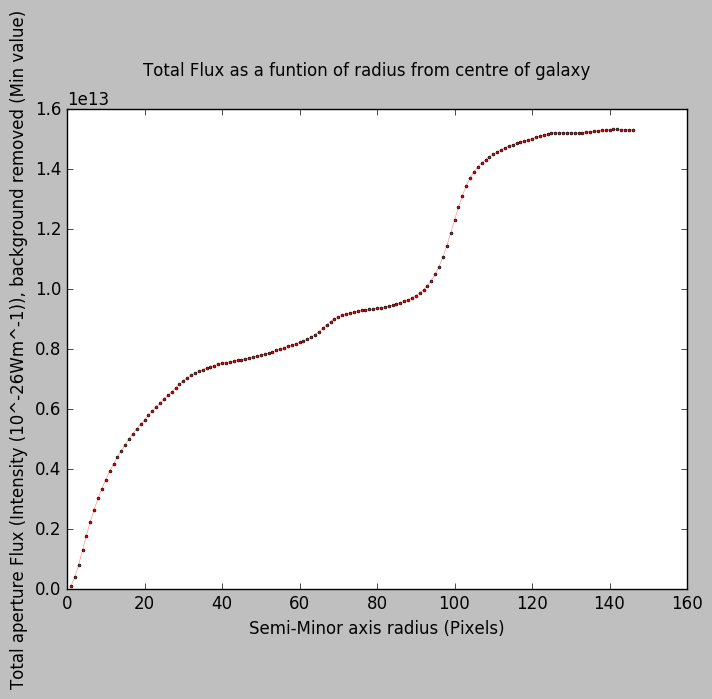

This is galaxy: 16


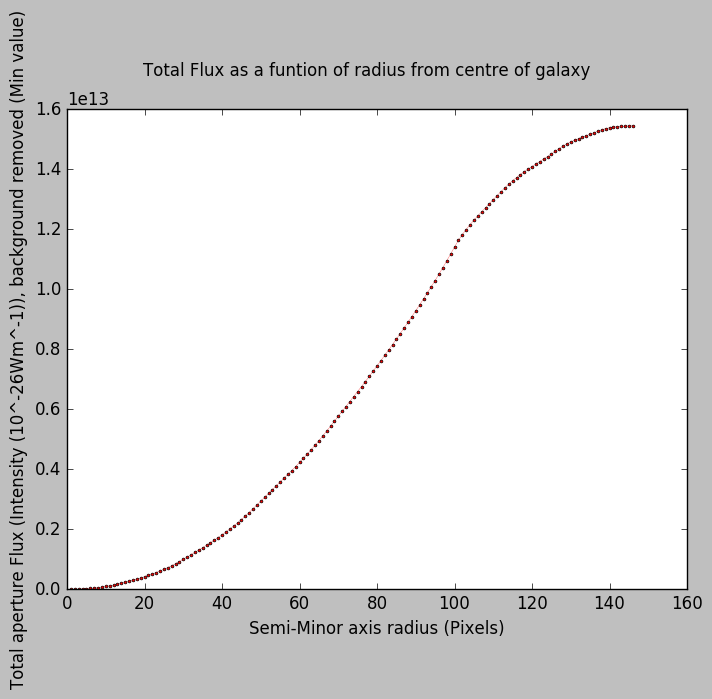

This is galaxy: 17


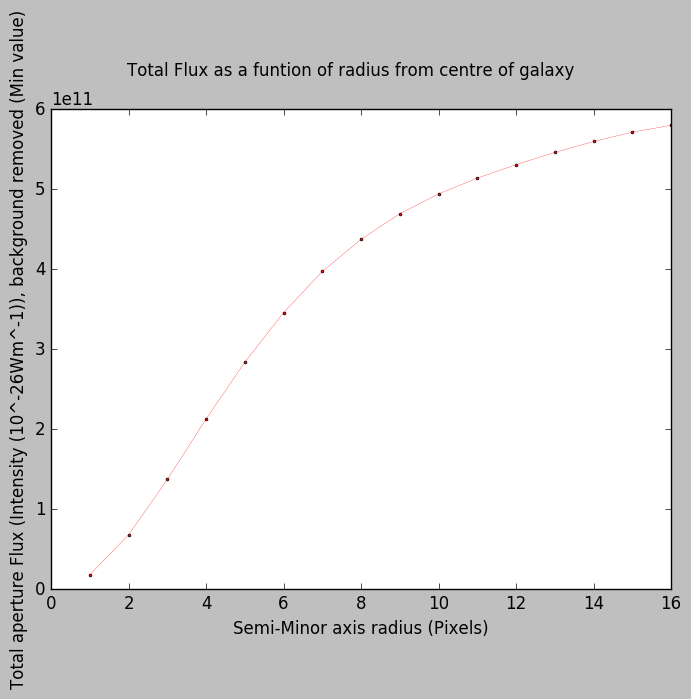

[3.6031300000151374, 3.1963300000124724, 2.5983300000085547, 3.3366400000133916, 2.7141400000093134, 3.279750000013019, 2e-05, 2e-05, 5.510169999960565, 12.09652999971122, 15.246019999591988, 16.443999999546637, 3.425860000013976, 3.6851400000156747, 48.09007000406493, 81.6934500147311, 5.089369999976496]


In [346]:
#Graphs of Total Flux vs radius
FluxPerPixelArray=[]
EffRadArray=[]
for i in arrmgePic:
    image_file = '/mnt/lb576-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/WISE/%d%c/%d%c/%d%c/%d%cW%iPic.fits' % (i, letter, i, letter, i, letter, i, letter, band)
    hdu_list = fits.open(image_file)
    image_data = hdu_list[0].data
    hdu_list.close()
    image_dataMin[i-1]=np.min(image_data)
    pixels = image_data.shape[0]*image_data.shape[1]
    image_dataPix[i-1]=pixels
    flat_image = list(image_data.flat)
    total = 0
    for l in range(pixels):
        total = total + flat_image[l]
    Ave=total/pixels
    
    RadArray=[]
    FluxAtRad=[]
    b=1
    
    if letter == 'a':
        ratioA=GalAMajAxis[i-1]/GalAMinAxis[i-1]
        #print("increment of major axis is:", ratioA)
        toprangeA=GalAMajAxis[i-1]+ratioA
        #print("Stop before major axis is:",  toprangeA)
        #print("Stop before minor is:", GalAMinAxis[i-1]+1)
        
        rad=ratioA
        
        while rad < toprangeA: ##########Needs to be changed back
            
            #print("major is:", rad)
            #print("minor is:", b)
            #print( )
            
            position = [(GalAPixCentreXVal[i-1],GalAPixCentreYVal[i-1])] #Aperture centre around the image centre
            apertures = EllipticalAperture(position, a=rad, b=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            image_dataAve[i-1]=Ave*ChosenBandCorrectionFactor
            data = image_data
            phot_table = aperture_photometry(data, apertures, method='subpixel', subpixels=10)
            photsum[i-1] = phot_table
            FluxAtRad.append(((phot_table[0][0]-((apertures.area())*Backgroundlevels[i-1]))*ChosenBandCorrectionFactor))   #Subtracts the background level
            a=apertures.area()
            RadArray.append(b)
            rad=rad+ratioA
            
            b=b+1
        
    else:
        ratioB=GalBMajAxis[i-1]/GalBMinAxis[i-1]
        #print("increment of major axis is:", ratioB)
        toprangeB=GalBMajAxis[i-1]+ratioB
        #print("Stop before major is:",  toprangeB)
        #print("Stop before minor is:", GalBMinAxis[i-1]+1)
        
        rad=ratioB
        
        while rad < toprangeB:
            
            #print("major is:", rad)
            #print("minor is:", b)
            print( )
                        
            position = [(GalBPixCentreXVal[i-1],GalBPixCentreYVal[i-1])] #Aperture centre around the image centre
            apertures = EllipticalAperture(position, a=rad, b=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            image_dataAve[i-1]=Ave*ChosenBandCorrectionFactor
            data = image_data
            phot_table = aperture_photometry(data, apertures, method='subpixel', subpixels=10)
            photsum[i-1] = phot_table
            FluxAtRad.append(((phot_table[0][0]-((apertures.area())*Backgroundlevels[i-1]))*ChosenBandCorrectionFactor))   #Subtracts the background level
            a=apertures.area()
            RadArray.append(b)
            rad=rad+ratioB
            b=b+1
    
    fit=0
    fit=np.polyfit(RadArray, FluxAtRad, 12)
    effrad=1e-5
    answer=0
    while answer <= ((FluxAtRad[-1])/2):
        answer = ((fit[0]*(effrad**12))+(fit[1]*(effrad**11))+(fit[2]*(effrad**10))+(fit[3]*(effrad**9))+(fit[4]*(effrad**8))+(fit[5]*(effrad**7))+(fit[6]*(effrad**6))+(fit[7]*(effrad**5))+(fit[8]*(effrad**4))+(fit[9]*(effrad**3))+(fit[10]*(effrad**2))+(fit[11]*(effrad**1))+(fit[12]))
        effrad=effrad+1e-5
    EffRadArray.append(effrad)
    
        
    FluxPerPixelArray.append((FluxAtRad[-1]))
    
    #print(FluxAtRad)
    #print(RadArray)
    
    print("This is galaxy:", i)
    plt.figure(1)
    y1 = FluxAtRad
    x=RadArray
    #plt.errorbar(x, y5A, xerr=(0.5, 0.7, 5.2, 3), ecolor='black', capthick=1.0, lw=1)
    line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
    plt.suptitle('Total Flux as a funtion of radius from centre of galaxy')
    plt.xlabel('Semi-Minor axis radius (Pixels)')
    plt.ylabel('Total aperture Flux (Intensity (10^-26Wm^-1)), background removed (Min value)')
    plt.show()

    
print(EffRadArray)

    
#print(FluxPerPixelArray)
#print ("Minimums (B) are:", (image_dataMin))
#print ( )
#print ("Pixels are:", (image_dataPix))
#print ( )
#print ("Averages within aperture are:" ,(image_dataAve))

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[2584952582.1961536, 2187501509.5365162, 1611719888.8729336, 1052569082.3483567, 642844413.11998165, 381524913.08246261, 230294706.70100999, 141889202.25678793, 92373140.682366744, 67126803.529978797, 52443878.404551923]
This is galaxy: 1


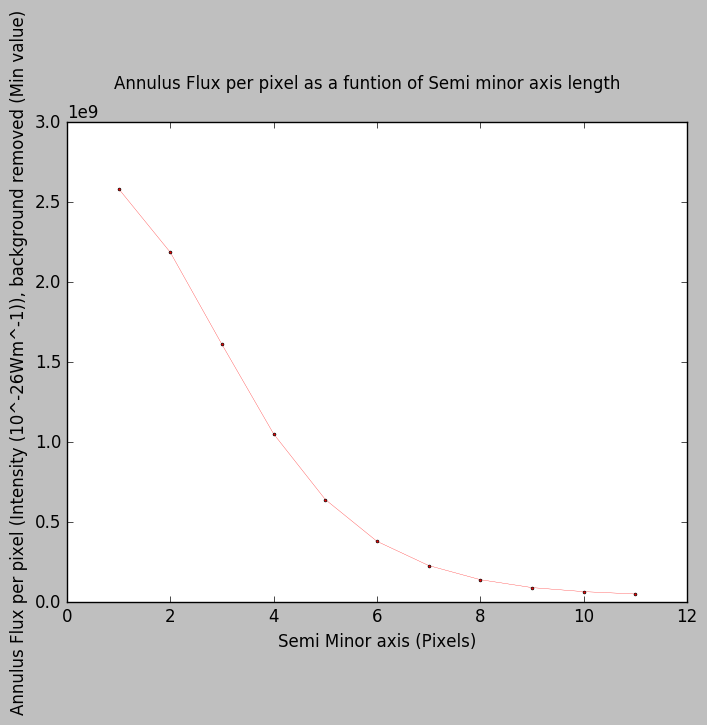

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[4973528431.0884018, 3953277774.5385966, 2753769618.6536989, 1745253983.7042804, 1003248153.4435431, 559290434.66492295, 311532974.4955408, 176825853.77636528, 100799311.48806256]
This is galaxy: 2


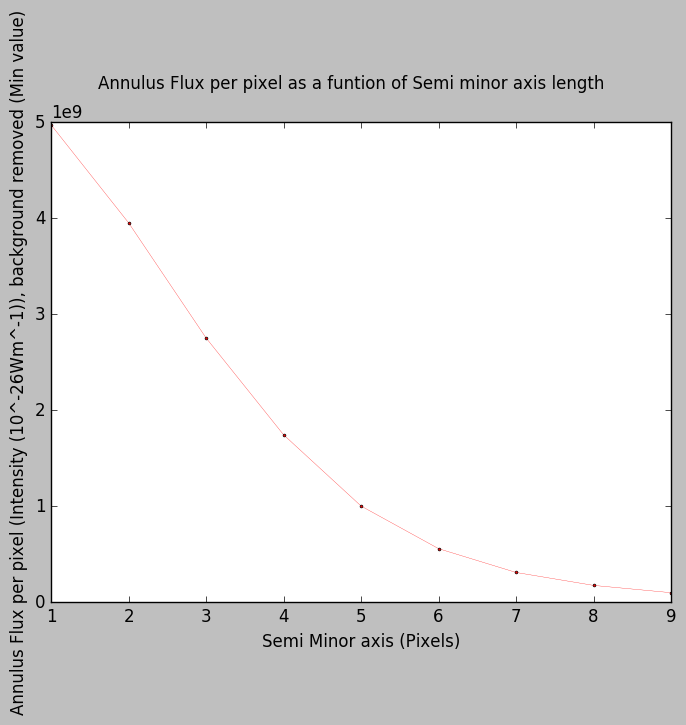

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[31053233481.114025, 24716837211.080017, 15837567717.854242, 8924780708.8085785, 4438567509.0892839, 1817544451.1505504]
This is galaxy: 3


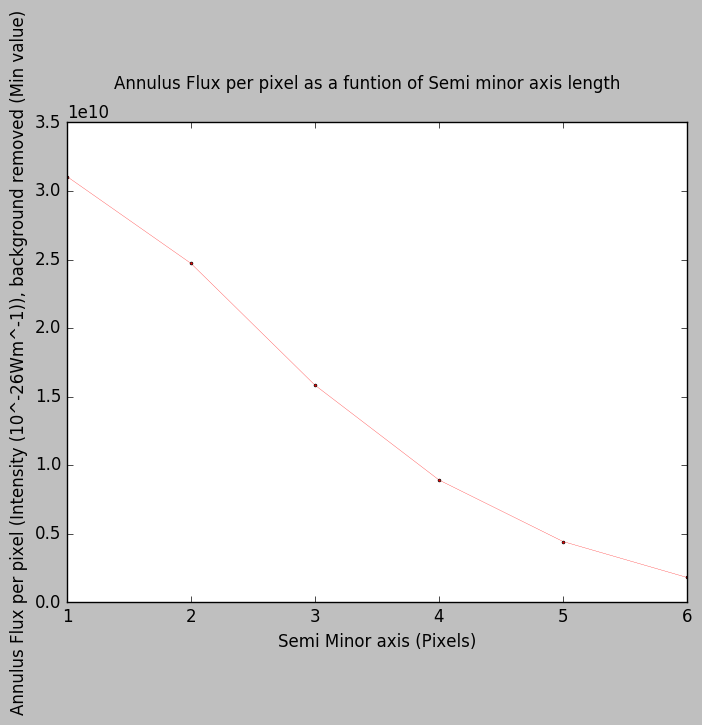

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[4257946411.9418445, 3759118927.6683373, 2855332039.7448878, 1910105854.0153551, 1131889002.1285641, 620500691.15572369, 337776120.42624092, 186104375.25651574, 103976458.64567941]
This is galaxy: 4


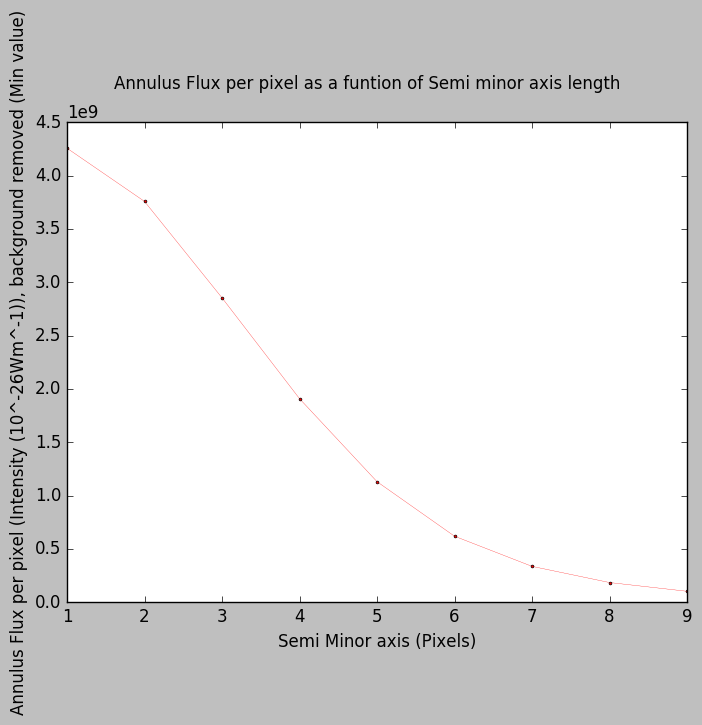

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[4271176663.8359499, 3232320423.0156298, 1978658556.880271, 1095486888.1153469, 587118924.36077893, 310095571.97873199, 166338340.98696637]
This is galaxy: 5


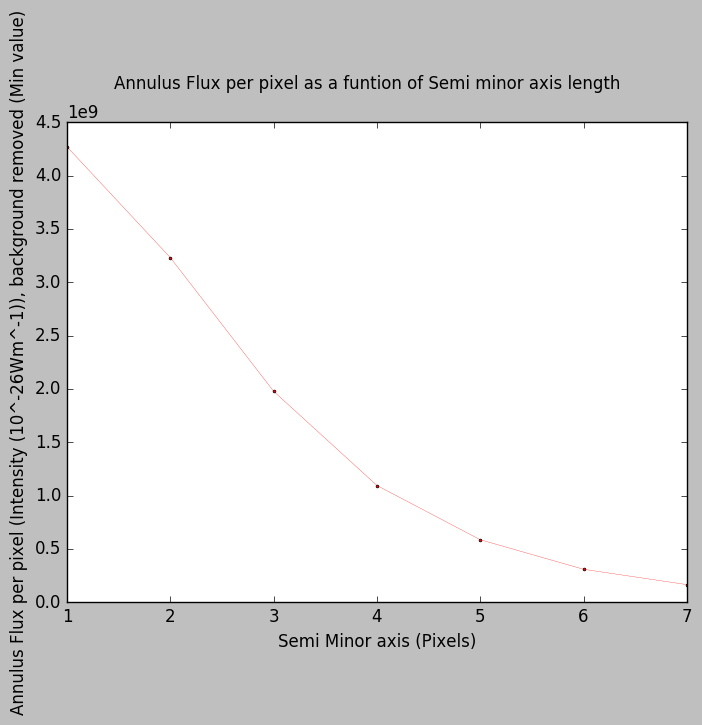

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[6630906436.4184332, 5829116023.057806, 4452459897.513958, 2972744321.732646, 1804824703.4373963, 1019218354.6279488, 525364286.26843786, 240588915.86480939]
This is galaxy: 6


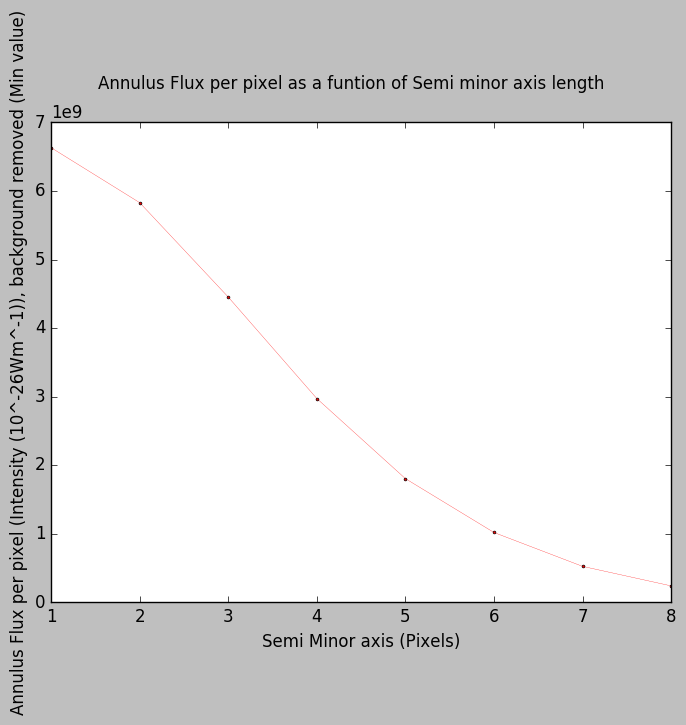

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[5958073276.1811399, 5304074111.1100264, 4299844954.6463661, 3144332995.4213805, 2199108361.1638312, 1437433943.3639476, 937229195.52634728, 596863355.54313505, 390134318.20038396, 258152710.97358695, 170576850.54706424, 102803615.66954279]
This is galaxy: 7


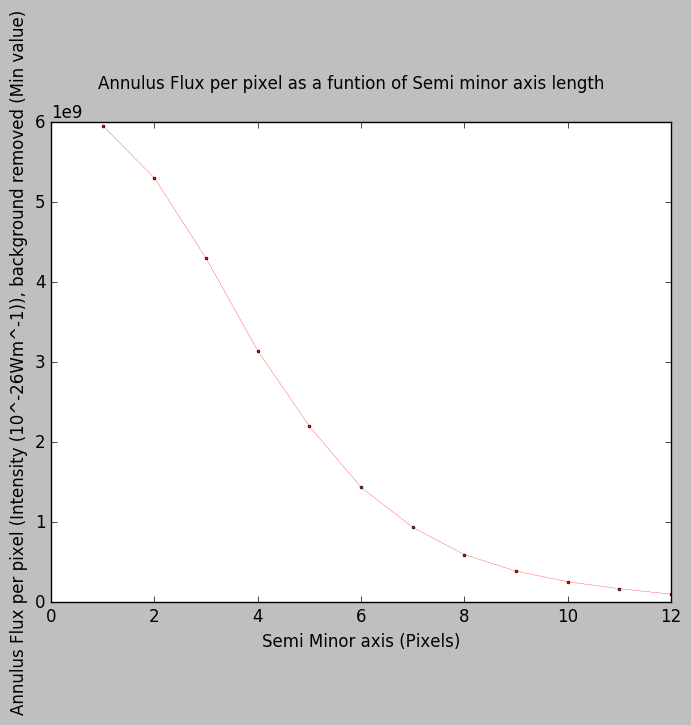

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[3909161403.6932988, 3599559067.8890886, 3084585271.5008707, 2394088444.7210989, 1791626461.6619334, 1232036673.7553694, 809017787.39904428, 526395651.95525676, 326924183.85316885, 212093654.092426, 134077099.242219, 90329565.448918775, 66792670.839697547, 50890866.376984775]
This is galaxy: 8


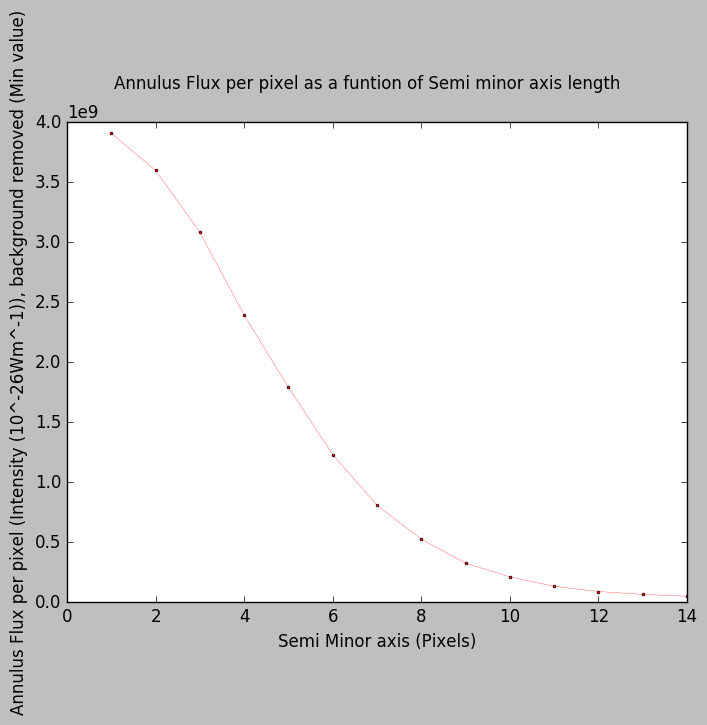

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[15117561643.729723, 13333636258.440653, 10944209759.780758, 8268826894.389123, 6093985422.4371319, 4317763354.5156898, 3102057414.3545876, 2240111228.0801249, 1632771957.9373889, 1232453357.1245682, 923085208.45627046, 718496222.82264435, 552975338.2176646, 436399527.08394086, 341257066.97728139, 262891029.46433833, 200413901.29384869, 145474891.73660049, 105435214.63725419, 73042342.734522834, 53916077.561448365]
This is galaxy: 9


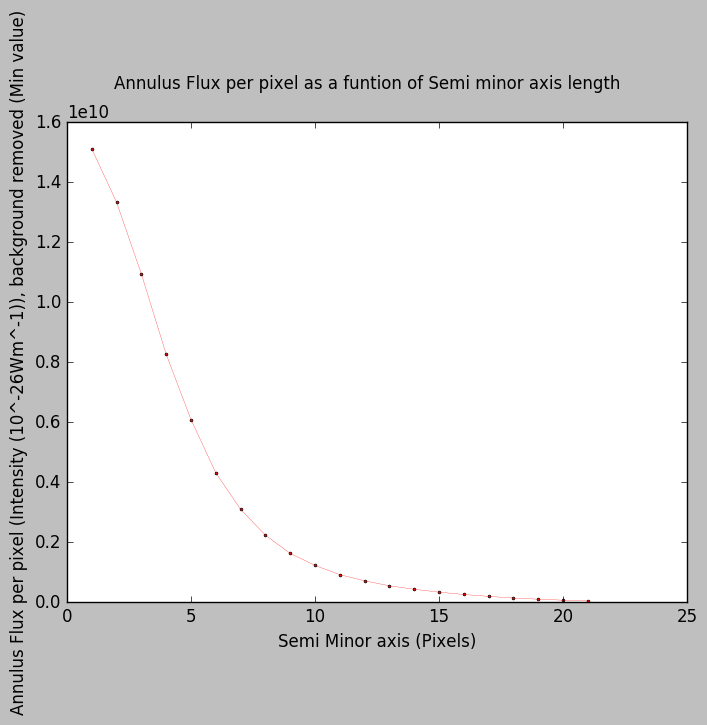

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[27859347295.555668, 25603151102.242527, 22014792591.292351, 17587452882.870319, 14030077240.903502, 10934425902.354937, 8679307309.1186218, 7177891878.9183989, 5995093424.0834026, 5199749498.737525, 4518803954.3272905, 3990356918.1941948, 3545633531.3850265, 3143404039.691596, 2791104620.8016958, 2471355904.1399822, 2201431954.2315617, 1955000984.2592371, 1735212430.8136966, 1555470353.4290464, 1384003804.085284, 1249128670.947288, 1125869449.9049866, 1009833465.8043057, 906140713.21303058, 806798439.40489078, 721766071.18647444, 641740227.6631043, 560375502.54224944, 485917825.0360589, 413650785.6285758, 357455715.27543867, 303107340.78455454, 256195392.6270465, 218716024.7218174, 182498462.77314305, 157796685.43365556, 133999212.15454997, 113241754.99307889, 97627450.525937483, 81392171.355101362, 71566765.640473455, 60675153.301947109, 49381123.695786662, 41688479.263732694, 33057722.920753531, 26112193.989270009, 18401904.497523047, 10732950.084050758, 4490458.8429737929, 310282.0

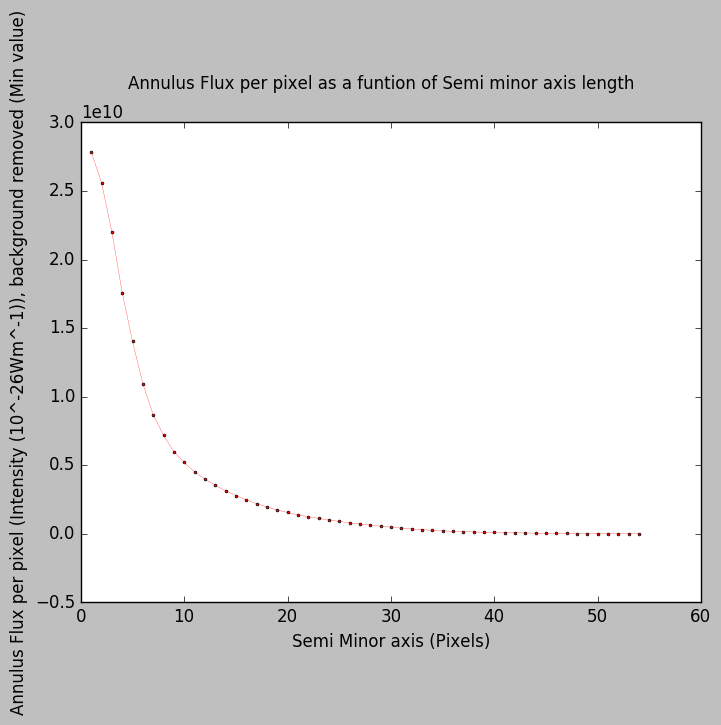

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[23657551623.901569, 22199855562.817711, 19396957910.504791, 16551616146.644611, 13587352104.010958, 11124406044.638952, 9280041635.5149269, 7788276456.2192707, 6704726594.0417576, 5863605071.1239233, 5233298604.1411295, 4728273158.9404745, 4322992436.0769482, 3995378388.7791228, 3683996535.5999641, 3405314824.6920819, 3137667096.4989605, 2861963219.3695474, 2612932810.4663606, 2364886132.7592649, 2141455133.681196, 1911640265.1907609, 1702080959.1172211, 1510216778.2221701, 1335286122.4117675, 1183608782.9027488, 1047620475.8100319, 928277847.57575667, 827015152.60335922, 736241547.72232473, 657398225.57964838, 582264562.4816972, 508076634.6114673, 448378374.86442685, 392266642.8943339, 347979461.76317424, 315261928.59376001, 284916039.44421512, 264836902.10347506, 247332951.04888865, 235010607.4534781, 223842285.91365966, 216002309.61604908, 209695796.16618723, 200789020.67109546, 191713724.66716951, 172556490.01339155, 150740775.31045568, 123191513.64509329, 96347489.025338188, 7747

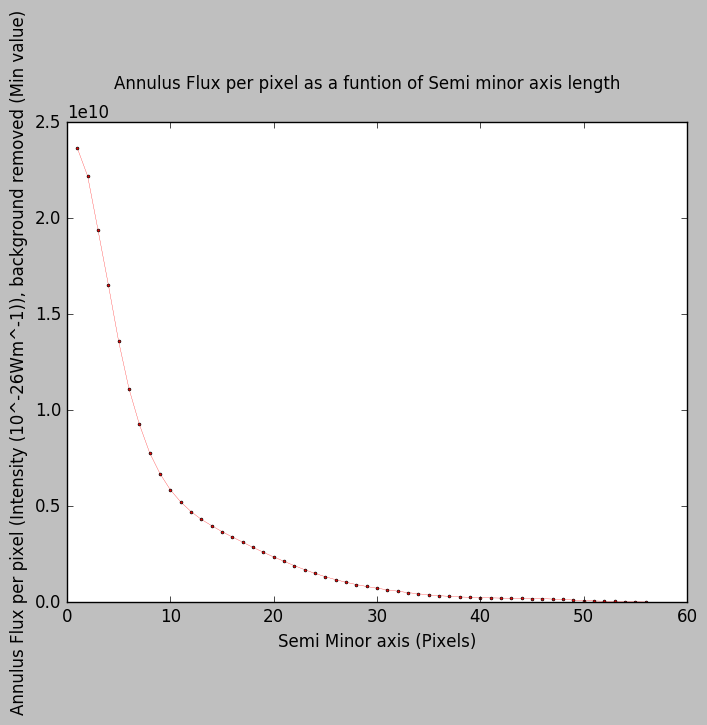

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[35165193358.907112, 32349522236.025848, 27681002820.062092, 22344529300.412849, 17770281270.371033, 13827352667.171778, 10971477332.268995, 8900973891.4373856, 7422381606.5473604, 6422348525.505846, 5652399399.5086098, 5096303584.936347, 4631555765.1544161, 4263509516.0621123, 3925483618.1882281, 3615894216.1665626, 3326138417.1571155, 3057886047.0327435, 2818172044.8212075, 2604167967.946157, 2393326639.0015388, 2201336423.7880034, 2027181468.5136473, 1864385712.6142406, 1705929829.6275647, 1551148387.8420718, 1428019005.706131, 1296365068.0641448, 1176143749.4884102, 1058984395.759933, 960534439.07521212, 868930789.24825418, 787419951.82282245, 717888731.0876013, 654256341.40952802, 593989736.2905252, 540365075.74002373, 488253408.70783299, 444973551.44170558, 407518364.13669229, 371147833.3766852, 339693852.60643828, 309483087.78423446, 286911430.01891041, 264173426.60641459, 240861076.12983927, 217936643.87975746, 199394700.0249916, 184000985.54589874, 166513003.39627206, 15148053

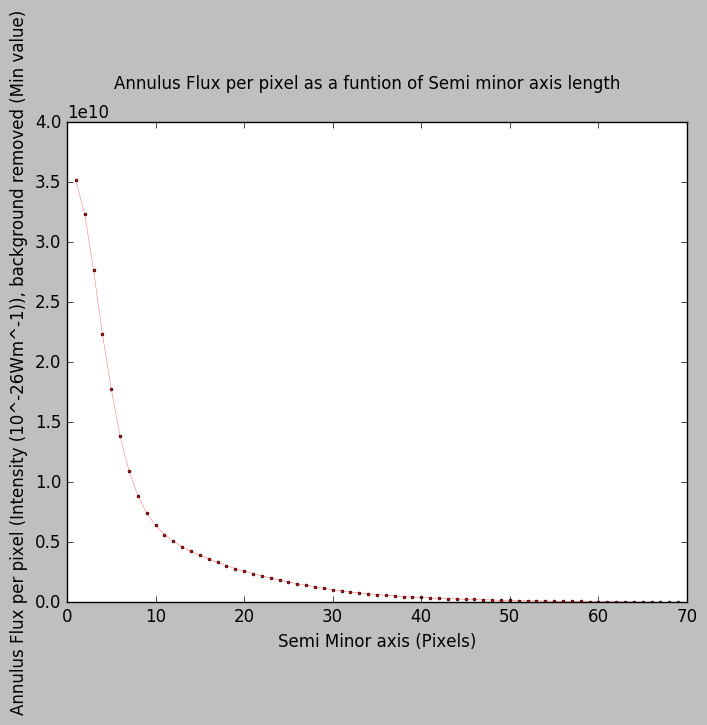

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[4566678783.5240812, 3878127722.8226256, 2854395723.3446879, 1870444767.1686673, 1133853449.2477293, 653574018.78166652, 374786579.55704385, 212786002.81727549, 126660571.48183842, 78456514.602583811]
This is galaxy: 13


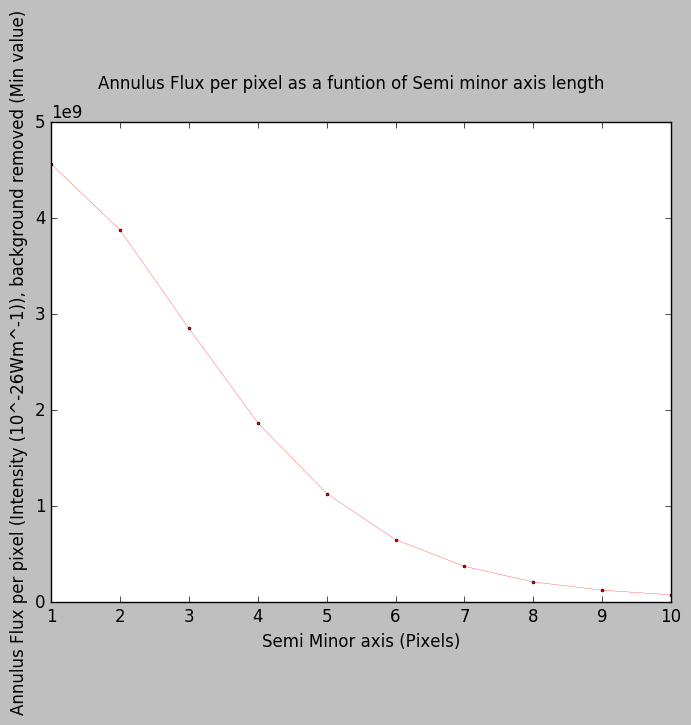

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[6453366752.7098188, 5826717451.6647968, 4606341643.5364981, 3366174130.7734299, 2251586858.5623021, 1374057853.3179877, 810016545.94585431, 437169797.76661217, 213449785.54785401]
This is galaxy: 14


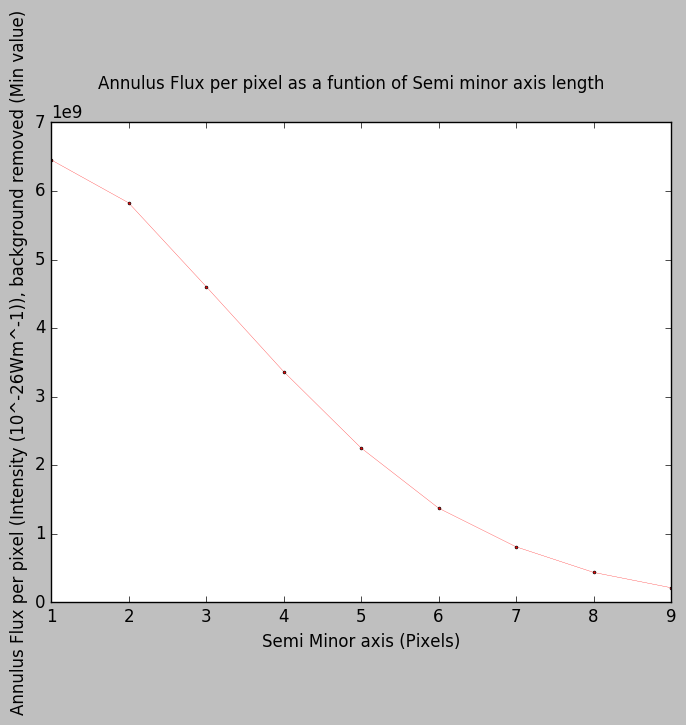

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[33978229680.401627, 31494179824.853275, 26856740157.275745, 21927350439.13258, 17220113463.449421, 13118885545.821573, 10082921807.827177, 7862150125.6970844, 6189870834.0794601, 5005066715.9122219, 4112930861.9789677, 3447038469.4835386, 2936787082.4307747, 2528111632.7054887, 2197319134.4803805, 1922316529.4691696, 1682253501.5980856, 1480721561.8742959, 1337775129.7392111, 1214341945.6204441, 1119067707.2637162, 1050784758.2083064, 970567495.75247431, 903638205.2452755, 838375343.61359715, 783241772.22586298, 744092440.31149566, 711531366.27535617, 676272799.1820085, 612371230.07963169, 527021544.38523608, 440494366.08385396, 363403614.91596532, 299849006.41709149, 255459258.29335231, 223554285.16023499, 195273527.77835488, 172044215.32471526, 151696735.84104258, 130325516.29013704, 115591880.31040512, 101266161.45791547, 94267800.965494767, 90034707.935167789, 88527520.48587665, 93542604.746859491, 97420711.571426272, 99468388.718496338, 104573297.32718401, 107094158.81608944, 106

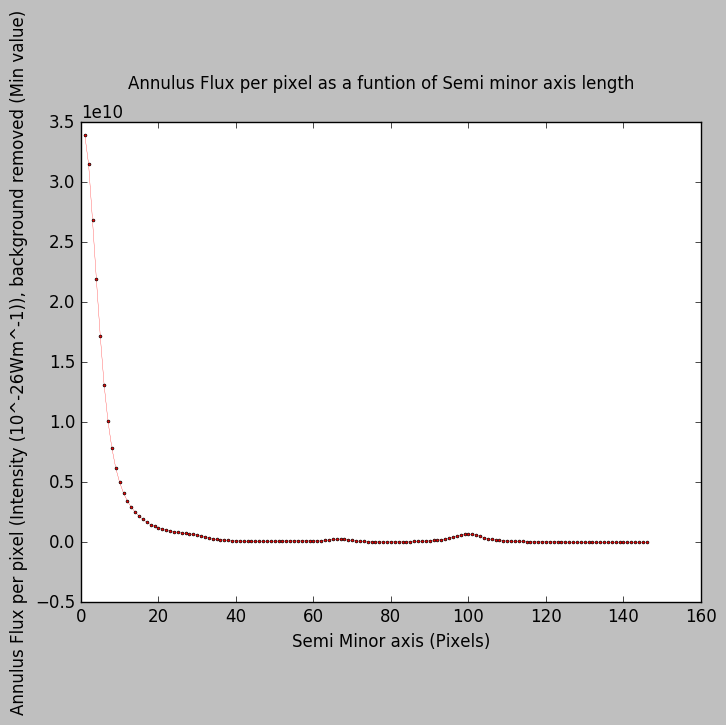

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[306238703.48585272, 306669273.64782399, 300697917.65729034, 303090591.79488873, 306136721.15231222, 302496383.44284022, 305907711.02884376, 314314148.94540274, 318510928.39747363, 326170325.06387579, 329817884.93416268, 333146888.21894741, 336676585.45873916, 340421056.67908031, 346741892.91390842, 353257776.55371541, 354508276.22458392, 350763485.06289476, 350973029.93651783, 345597183.14760745, 341775663.00588655, 344699660.23600453, 342818689.9242487, 348011403.17306316, 354798138.62384182, 363418272.16448283, 375649378.9622488, 387253881.08285338, 397027826.23828101, 399217986.02889305, 392911072.25292158, 387481837.28175092, 381606222.83054823, 373769964.36505502, 368632310.0327931, 365436964.80431449, 361514435.63539892, 360731636.57880598, 362301348.84196711, 362562108.83843893, 367740033.69285113, 370904772.07307142, 379267549.25053793, 387579161.72392583, 395663969.90498251, 406373069.4723419, 412477185.41602701, 414293716.82705444, 417161801.44466114, 416084263.17473358, 407

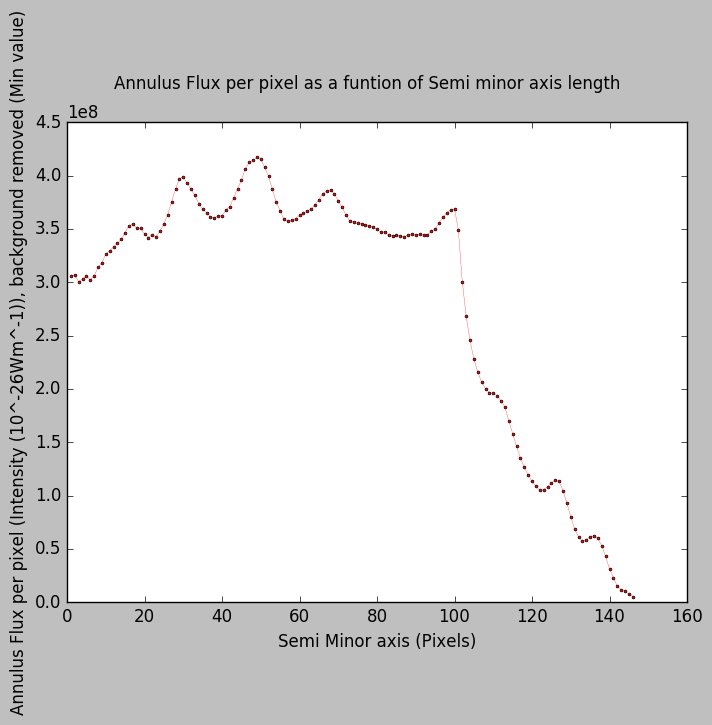

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


[5082307134.327302, 4581049429.5790119, 3819372250.7224503, 2969573235.8331532, 2179703316.5704465, 1551092109.1141942, 1090073669.075197, 739520770.20660102, 518242114.36842197, 358860387.18327427, 259236496.93802273, 201371097.81426722, 168498770.87877107, 139793686.02531314, 110452971.88300881, 76119383.493039221]
This is galaxy: 17


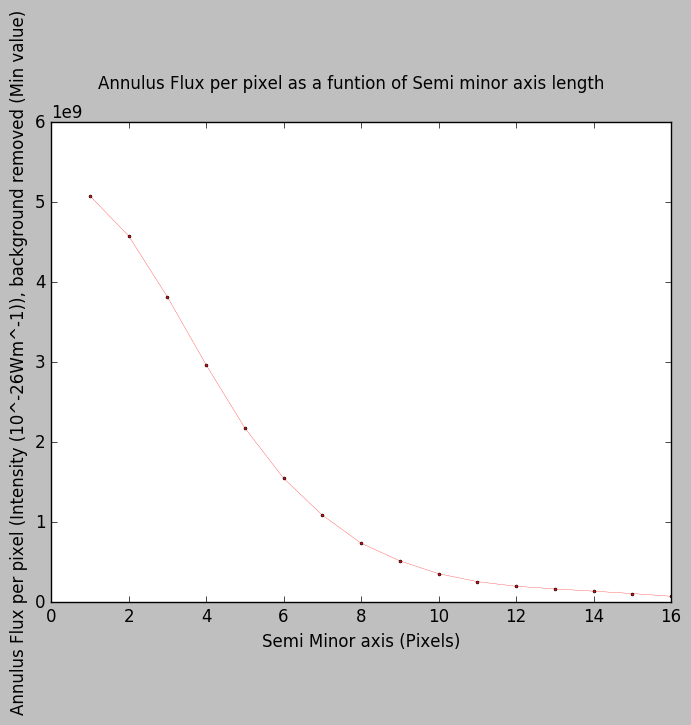

In [347]:
#Graphs of Change of flux per pixel vs radius

for i in arrmgePic:
    image_file = '/mnt/lb576-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/WISE/%d%c/%d%c/%d%c/%d%cW%iPic.fits' % (i, letter, i, letter, i, letter, i, letter, band)
    hdu_list = fits.open(image_file)
    image_data = hdu_list[0].data
    hdu_list.close()
    image_dataMin[i-1]=np.min(image_data)
    pixels = image_data.shape[0]*image_data.shape[1]
    image_dataPix[i-1]=pixels
    flat_image = list(image_data.flat)
    total = 0
    for l in range(pixels):
        total = total + flat_image[l]
    Ave=total/pixels

   
    RadArray=[]
        
    AnnulusFlux=[]
    DeltaFluxAtRad=[]
    
    b=1
    
    if letter == 'a':
        
        ratioA=GalAMajAxis[i-1]/GalAMinAxis[i-1]
        #print("increment of major axis is:", ratioA)
        
        toprangeA=GalAMajAxis[i-1]+ratioA
        #print("Stop before major axis is:",  toprangeA)
             
        #print("Stop before minor is:", GalAMinAxis[i-1]+1)
        
        rad=ratioA
           
        
        while rad < toprangeA:
            position = [(GalAPixCentreXVal[i-1],GalAPixCentreYVal[i-1])] #Aperture centre around the image centre
            annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioA, a_out=rad, b_out=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            image_dataAve[i-1]=Ave*ChosenBandCorrectionFactor
            data = image_data
            phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
            annulus_area=annulus_apertures.area()
            photsum[i-1] = phot_table
            AnnulusFlux.append((((phot_table[0][0])-(Backgroundlevels[i-1]*annulus_area))*ChosenBandCorrectionFactor)/annulus_area)
            RadArray.append(b)
            rad=rad+ratioA
            b=b+1
    else:
        ratioB=GalBMajAxis[i-1]/GalBMinAxis[i-1]
        print("increment of major axis is:", ratioB)
        
        toprangeB=GalBMajAxis[i-1]+ratioB
        print("Stop before major is:",  toprangeB)
        
        print("Stop before minor is:", GalBMinAxis[i-1]+1)
        
        rad=ratioB
      
        while rad < toprangeB:
            position = [(GalAPixCentreXVal[i-1],GalAPixCentreYVal[i-1])] #Aperture centre around the image centre
            annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioB, a_out=rad, b_out=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            image_dataAve[i-1]=Ave*ChosenBandCorrectionFactor
            data = image_data
            phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
            annulus_area=annulus_apertures.area()
            photsum[i-1] = phot_table
            AnnulusFlux.append((((phot_table[0][0])-(Backgroundlevels[i-1]*annulus_area))*ChosenBandCorrectionFactor)/annulus_area)
            RadArray.append(b)
            rad=rad+ratioA
            b=b+1
            
            
    #print(RadArray)
    print(AnnulusFlux)
       
    print("This is galaxy:", i)
    plt.figure(1)
    y1 = AnnulusFlux
    x= RadArray
    #plt.errorbar(x, y5A, xerr=(0.5, 0.7, 5.2, 3), ecolor='black', capthick=1.0, lw=1)
    line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
    plt.suptitle("Annulus Flux per pixel as a funtion of Semi minor axis length")
    plt.xlabel('Semi Minor axis (Pixels)')
    plt.ylabel('Annulus Flux per pixel (Intensity (10^-26Wm^-1)), background removed (Min value)')
    #labels = ['', '','','','5', '', '', '','','10','', '','','','15', '', '', '','','20','', '','','','25', '', '', '','','30','', '','','','35', '', '', '','','40','', '','','','45', '', '', '','','50','', '','','','55', '', '', '','','60','', '','','','65', '', '', '','','70','', '','','','75', '', '', '','','80','', '','','','85','','','','','90','', '','','','95', '', '', '','','100']
    #plt.xticks(x, labels, rotation='vertical')

    plt.show()